<a href="https://colab.research.google.com/github/sashera1/CS-4770-Homeworks/blob/main/CS_4770_NLP_Fall_2025_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 3: Word Embeddings**

### *CS 4770 Natural Language Processing (Fall 2025)*

In this assignment, you will explore word embedding techniques using Python. You will start by working with raw frequencies and TF-IDF, understand pre-trained word embeddings, train your own word2vec embeddings, and apply these embeddings to NLP tasks.

### **Overview:**

1. TF-IDF Embeddings
2. Understand Pre-trained GloVe Embeddings
3. Train Your Own Word2Vec Embeddings
4. Classification Using Word Embeddings

In [6]:
!pip install gensim

In [7]:
# import packages
import numpy as np
from pprint import pprint
from gensim.models import Word2Vec
import gensim.downloader
from gensim.models.word2vec import Text8Corpus
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4, suppress=True)

np.random.seed(99)

You will receive a warning prompting you to restart the session and then continue.


### 1. Calculate raw frequencies and TF-IDF.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Simple corpus
corpus = [
    "vim is a powerful text editor loved by programmers",
    "learning vim commands can greatly boost productivity",
    "vim is lightweight yet highly customizable",
    "many developers enjoy the efficiency of vim keybindings",
]

# Calculate Cosine Similarity
def document_similarity(doc_vectors):
    similarity = cosine_similarity(doc_vectors)
    return similarity

"""
TODO: (a) Implement the raw word frequencies function. Return a two-dimensional array where each row contains the word counts in each document (output should be converted via toarray()).
(Hint: Use the function CountVectorizer)
"""
def calculate_raw_frequencies(corpus):
    # Your code goes here
    pass

"""
TODO: (b) Implement TF-IDF reweighting. Return a two-dimensional array where each row contains the TF-IDF features of each document (output should be converted via toarray()).
(Hint: Use the function TfidfVectorizer)
"""
def calculate_tfidf(corpus):
    # Your code goes here
    pass


In [ ]:
# Raw frequencies and document similarity
raw_count = calculate_raw_frequencies(corpus)
print(raw_count)

similarity_raw = document_similarity(raw_count)
print("\nDocument Similarity Matrix (Raw Frequencies):")
pprint(similarity_raw)

In [ ]:
# TF-IDF and document similarity
tfidf = calculate_tfidf(corpus)
print("\nTF-IDF Matrix:")
pprint(tfidf)

similarity_tfidf = document_similarity(tfidf)
print("\nDocument Similarity Matrix (TF-IDF):")
pprint(similarity_tfidf)

### 2. Understand pretrained GloVe embedding

In [11]:
# load pretrained word vectors. it will take a little bit long but you only need to download it once
word_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

The word "language" is represented by the 300 dimensional vector:

In [ ]:
print(word_vectors["language"])

Next, we'll compute semantic similarity between words from a few different categories:

In [18]:
# words and its corresponding categories
categories = [
    "insects", "instruments",
    "positive", "negative",
    "STEM", "humanities"
]

my_words = [
    "ant", "bee", "fly", "mosquito", "ladybug",
    "piano", "guitar", "drum", "violin", "flute",
    "happy", "fun", "love", "smile", "joy",
    "sad", "angry", "fear", "pain", "bad",
    "mathematics", "science", "computer", "engineer", "physics",
    "art", "story", "poem", "dance", "music",
]

In [ ]:
my_word_vectors = np.array([word_vectors[word] for word in my_words])

"""
TODO: (a) calculate the pair-wise cosine similarity matrix between all the words using the word vectors.
(Hint: Use the function cosine_similarity)
"""
# Your code goes here
similarity_matrix = None

# plot the similarity matrix
plt.figure(figsize=(10, 10))
plt.imshow(similarity_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(my_words)), my_words, rotation=90)
plt.yticks(np.arange(len(my_words)), my_words)
plt.title("Cosine Similarity between Words")
plt.show()


In [29]:
# Analysis the analogy of the word vectors

"""
TODO: (c) Define the analogy function, which calculates the vector of the fourth word in the analogy
(Hint: Use the most_similar function: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html)
"""
def get_analogy(word1, word2, word3, word_vectors):
    # Your code goes here
    return word_vectors.most_similar(positive=[word2,word3],negative=[word1])

# Perform the analogy task and print the results
analogies = [
    ('king', 'queen', 'prince'),
    ('short', 'shortest', 'wide'),
    ('happy', 'sad', 'large'),
    ('run', 'ran', 'jump'),
    ('they', 'them', 'we'),
    ('eat', 'eating', 'fly'),
    ('king','man','queen')
]

for word1, word2, word3 in analogies:
    result = get_analogy(word1, word2, word3, word_vectors)
    print(f"Analogy: {word1} is to {word2} as {word3} is to {result[0][0]}")


Analogy: king is to queen as prince is to princess
Analogy: short is to shortest as wide is to widest
Analogy: happy is to sad as large is to small
Analogy: run is to ran as jump is to jumped
Analogy: they is to them as we is to you
Analogy: eat is to eating as fly is to flying
Analogy: king is to man as queen is to woman


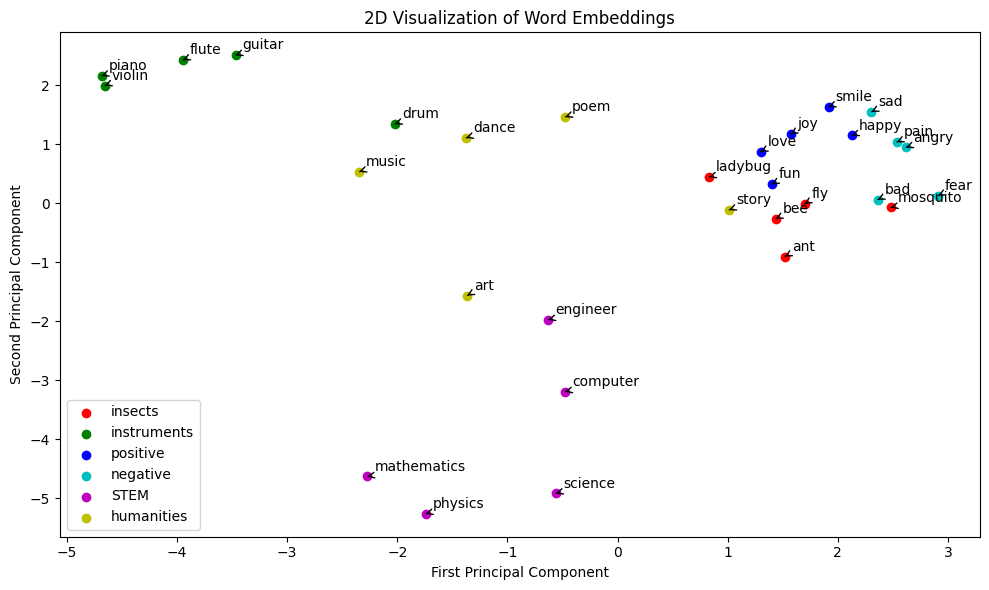

In [21]:
"""
TODO: (d) obtain the embeddings of words in my_words and add to embeddings_to_plot
"""
embeddings_to_plot = []
for word in my_words:
    wv = word_vectors[word]
    embeddings_to_plot.append(wv)


# Convert to numpy array
embeddings_to_plot = np.array(embeddings_to_plot)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_to_plot)

# Plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i, category in enumerate(categories):
    start = i * 5
    end = start + 5
    plt.scatter(embeddings_2d[start:end, 0], embeddings_2d[start:end, 1], c=colors[i], label=category)

    for j, word in enumerate(my_words[start:end]):
        plt.annotate(word, (embeddings_2d[start+j, 0], embeddings_2d[start+j, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.0),
                     fontsize=10,
                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Visualization of Word Embeddings')
plt.legend()
plt.tight_layout()
plt.show()

### 3. Train word2vec embeddings with `gensim`

In [22]:
dataset = api.load("text8")

# take the first 100 sentences as our training set
sentences = list(dataset)[:100]

categories = [
    "joyful", "sad", "science", "arts"
]

my_words = [
    "happiness", "excitement", "love", "pleasure",      # joyful
    "anger", "fear", "pain", "frustration",             # sad
    "biology", "mathematics", "physics", "engineering",        # science
    "painting", "poetry", "music", "dance",             # arts
]

"""
TODO: (a) Complete the train_word2vec function.
(Hint: Use the Word2Vec Model class: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html)
"""
def train_word2vec(corpus, window_size, vector_size=100, min_count=5, sg=1, workers=20): #sg=1 skip gram
    # Your code goes here
    return Word2Vec(corpus, window=window_size, vector_size=vector_size, min_count=min_count,sg=sg, workers=workers)


[==================================================] 100.0% 31.6/31.6MB downloaded


In [23]:
"""
TODO: (b) Train word2vec in different window sizes. word2vec_models should store the three word embedding models.
(Hint: You can pass in only the corpus and window_size to the train_word2vec function, and leave other arguments as their default values)
(Note: The training can take a few minutes to finish!)
"""
word2vec_models = []
for window_size in [2, 5, 10]:
    # Your code goes here
    print(f"\n--- Training Embeddings for Window Size: {window_size} ---")
    word2vec_models.append(train_word2vec(sentences, window_size))


--- Training Embeddings for Window Size: 2 ---

--- Training Embeddings for Window Size: 5 ---

--- Training Embeddings for Window Size: 10 ---


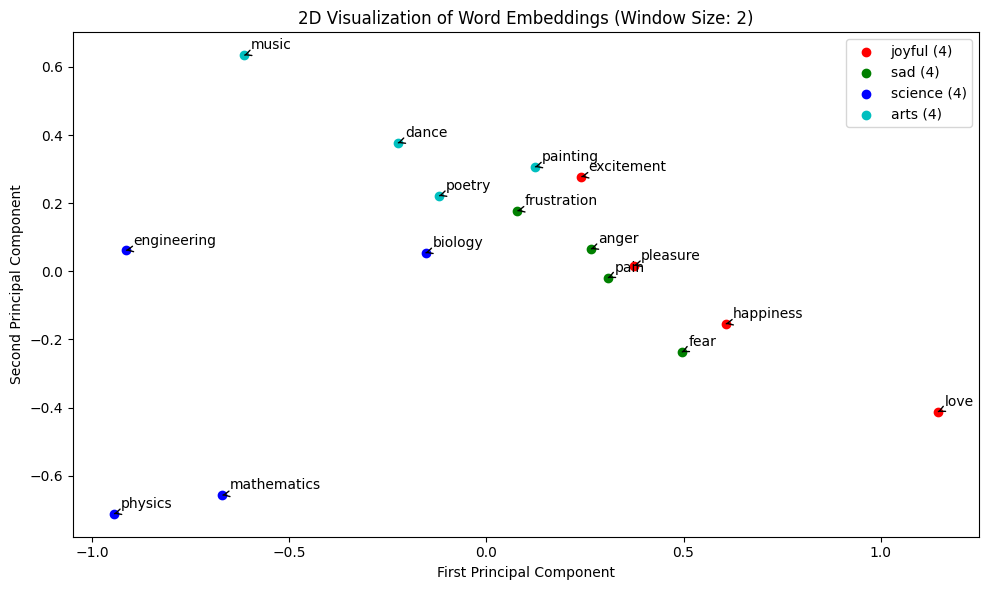

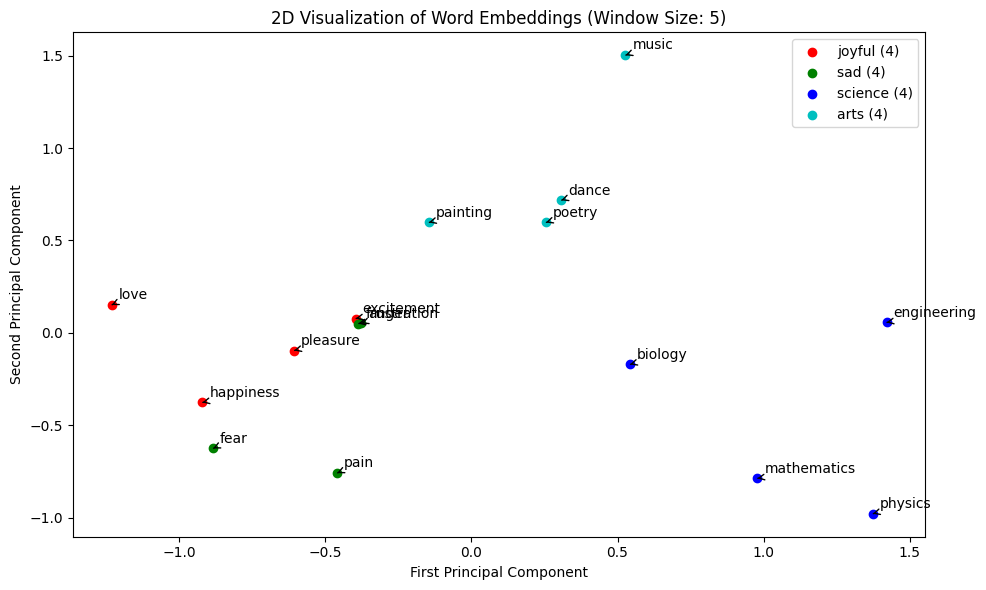

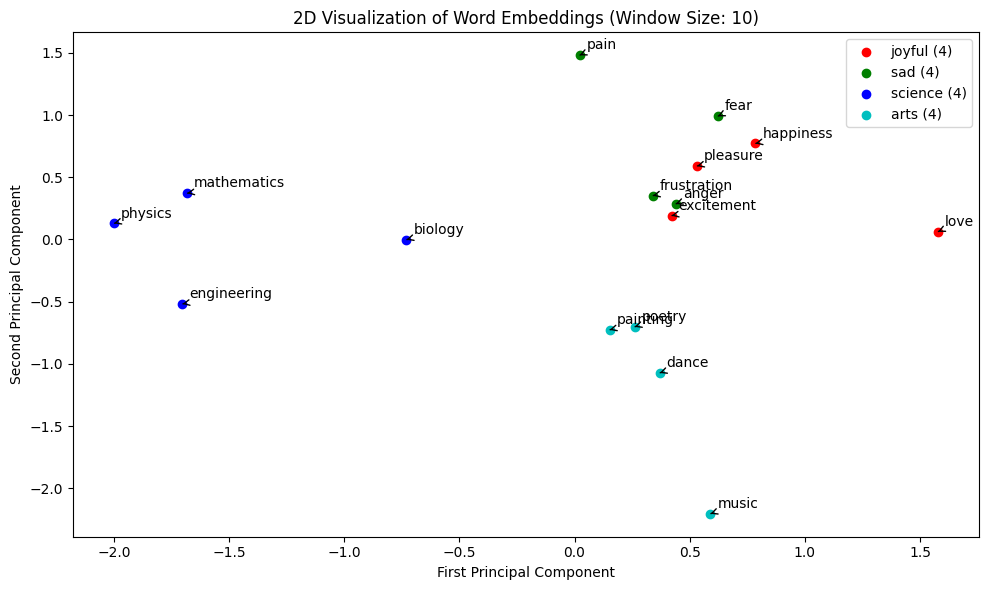

In [25]:
def visualize_embeddings(model, words, categories):
    embeddings_to_plot = []
    valid_words = []
    category_sizes = []

    for i, category in enumerate(categories):
        start = i * 4
        end = start + 4
        category_words = words[start:end]
        category_embeddings = []
        category_valid_words = []

        for word in category_words:
            try:
                category_embeddings.append(model.wv[word])
                category_valid_words.append(word)
            except KeyError:
                print(f"Warning: '{word}' not found in the model vocabulary.")

        embeddings_to_plot.extend(category_embeddings)
        valid_words.extend(category_valid_words)
        category_sizes.append(len(category_valid_words))

    # Convert to numpy array
    embeddings_to_plot = np.array(embeddings_to_plot)

    # Perform PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_to_plot)

    # Plot
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    start = 0
    for i, (category, size) in enumerate(zip(categories, category_sizes)):
        end = start + size
        plt.scatter(embeddings_2d[start:end, 0], embeddings_2d[start:end, 1], c=colors[i], label=f"{category} ({size})")

        for j, word in enumerate(valid_words[start:end]):
            plt.annotate(word, (embeddings_2d[start+j, 0], embeddings_2d[start+j, 1]), xytext=(5, 2),
                         textcoords='offset points', ha='left', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.0),
                         fontsize=10,
                         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        start = end

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'2D Visualization of Word Embeddings (Window Size: {model.window})')
    plt.legend()
    plt.tight_layout()
    plt.show()


"""
TODO: (c) visualize the embeddings.
"""
for model in word2vec_models:
    visualize_embeddings(model, my_words, categories)


### 4. Classification Using Word Embeddings.

In [27]:
import numpy as np
import torch

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# load pretrained word vectors
word_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

# Calculate sentence embeddings as averaged word embeddings
def sentence_vector(sentence, word_vectors):
    """Calculates the average word vector for a sentence."""
    words = sentence.lower().split()  # Fixed: split into words
    vectors = [word_vectors[word] for word in words if word in word_vectors]

    if not vectors:
        return torch.zeros(word_vectors.vector_size, device=device)

    # Convert to PyTorch tensor and move to GPU
    vectors_tensor = torch.tensor(np.array(vectors), device=device, dtype=torch.float32)
    return vectors_tensor.mean(dim=0)

# Define some example categories and keywords
categories = {
    "travel": ["travel", "vacation", "trip"],
    "music": ["music", "song", "listen"],
    "health": ["health", "exercise", "fit"],
}

# Calculate category vectors
category_vectors = {category: sentence_vector(' '.join(words), word_vectors) for category, words in categories.items()}

def vec_cosine_similarity(vec1, vec2):
    """Calculate cosine similarity between two PyTorch tensors on GPU."""
    # Use PyTorch operations for GPU acceleration
    norm1 = torch.norm(vec1)
    norm2 = torch.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return torch.tensor(0.0, device=device)

    return torch.dot(vec1, vec2) / (norm1 * norm2)

"""
TODO: (a) Implement the classify_sentence function with word embeddings.
(Hint: You should compute the cosine similarity between the sentence vector and the category vectors,
and predict the category with the highest cosine similarity to the sentence vector)
"""
def classify_sentence(sentence, word_vectors, category_vectors):
    sentence_embedding = sentence_vector(sentence, word_vectors)
    category_similarity = {}
    for category, category_vec in category_vectors.items():
      category_similarity[category] = vec_cosine_similarity(sentence_embedding, category_vec)
    max_value = max(category_similarity.values())
    return [key for key, value in category_similarity.items() if value==max_value][0]



# Classify new sentences
sentences = [
    "Last summer, I visited Paris and explored the local culture.",
    "She can play the guitar beautifully and writes her own songs.",
    "Running every morning helps me stay energetic.",
]

for sentence in sentences:
    predicted_category = classify_sentence(sentence, word_vectors, category_vectors)
    print(f"Sentence: '{sentence}'")
    print(f"Predicted Category: {predicted_category}\n")

Using device: cpu
Sentence: 'Last summer, I visited Paris and explored the local culture.'
Predicted Category: travel

Sentence: 'She can play the guitar beautifully and writes her own songs.'
Predicted Category: music

Sentence: 'Running every morning helps me stay energetic.'
Predicted Category: health

